#UNIVERSAL SENTENCE ENCODER

In [ ]:
!pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 4.2 MB 5.5 MB/s 
     |████████████████████████████████| 6.6 MB 42.5 MB/s 
     |████████████████████████████████| 596 kB 49.5 MB/s 
     |████████████████████████████████| 86 kB 4.5 MB/s 
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


##Libraries

In [ ]:
#Gathering required libraries 

import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import re
from string import punctuation

# Import NLTK packages 
import nltk
from nltk.tokenize import word_tokenize

from nltk.stem import PorterStemmer
stemmer = PorterStemmer()

# Import scikit
from sklearn.preprocessing import MinMaxScaler
scale = MinMaxScaler()
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier

##Data Loading

In [ ]:
train_data = pd.read_csv("/content/2018-E-c-En-train.txt",sep="	")
validate_data =  pd.read_csv("/content/2018-E-c-En-dev.txt", sep= "	")
test_data =  pd.read_csv("/content/2018-E-c-En-test-gold.txt", sep= "	")


data = pd.concat([train_data,validate_data, test_data], sort=True)

In [ ]:
data.head()

,ID,Tweet,anger,anticipation,disgust,fear,joy,love,optimism,pessimism,sadness,surprise,trust
0,2017-En-21441,“Worry is a down payment on a problem you may ...,0,1,0,0,0,0,1,0,0,0,1
1,2017-En-31535,Whatever you decide to do make sure it makes y...,0,0,0,0,1,1,1,0,0,0,0
2,2017-En-21068,@Max_Kellerman it also helps that the majorit...,1,0,1,0,1,0,1,0,0,0,0
3,2017-En-31436,Accept the challenges so that you can literall...,0,0,0,0,1,0,1,0,0,0,0
4,2017-En-22195,My roommate: it's okay that we can't spell bec...,1,0,1,0,0,0,0,0,0,0,0


##Pre-Process

In [ ]:
# Dictionary Contractions
dictionary = {
  "ain't": "am not",
  "aren't": "are not",
  "can't": "cannot",
  "can't've": "cannot have",
  "'cause": "because",
  "could've": "could have",
  "couldn't": "could not",
  "couldn't've": "could not have",
  "didn't": "did not",
  "doesn't": "does not",
  "don't": "do not",
  "hadn't": "had not",
  "hadn't've": "had not have",
  "hasn't": "has not",
  "haven't": "have not",
  "he'd": "he would",
  "he'd've": "he would have",
  "he'll": "he will",
  "he'll've": "he will have",
  "he's": "he is",
  "how'd": "how did",
  "how'd'y": "how do you",
  "how'll": "how will",
  "how's": "how is",
  "I'd": "I would",
  "I'd've": "I would have",
  "I'll": "I will",
  "I'll've": "I will have",
  "I'm": "I am",
  "I've": "I have",
  "isn't": "is not",
  "it'd": "it had",
  "it'd've": "it would have",
  "it'll": "it will",
  "it'll've": "it will have",
  "it's": "it is",
  "let's": "let us",
  "ma'am": "madam",
  "mayn't": "may not",
  "might've": "might have",
  "mightn't": "might not",
  "mightn't've": "might not have",
  "must've": "must have",
  "mustn't": "must not",
  "mustn't've": "must not have",
  "needn't": "need not",
  "needn't've": "need not have",
  "o'clock": "of the clock",
  "oughtn't": "ought not",
  "oughtn't've": "ought not have",
  "shan't": "shall not",
  "sha'n't": "shall not",
  "shan't've": "shall not have",
  "she'd": "she would",
  "she'd've": "she would have",
  "she'll": "she will",
  "she'll've": "she will have",
  "she's": "she is",
  "should've": "should have",
  "shouldn't": "should not",
  "shouldn't've": "should not have",
  "so've": "so have",
  "so's": "so is",
  "that'd": "that would",
  "that'd've": "that would have",
  "that's": "that is",
  "there'd": "there had",
  "there'd've": "there would have",
  "there's": "there is",
  "they'd": "they would",
  "they'd've": "they would have",
  "they'll": "they will",
  "they'll've": "they will have",
  "they're": "they are",
  "they've": "they have",
  "to've": "to have",
  "wasn't": "was not",
  "we'd": "we had",
  "we'd've": "we would have",
  "we'll": "we will",
  "we'll've": "we will have",
  "we're": "we are",
  "we've": "we have",
  "weren't": "were not",
  "what'll": "what will",
  "what'll've": "what will have",
  "what're": "what are",
  "what's": "what is",
  "what've": "what have",
  "when's": "when is",
  "when've": "when have",
  "where'd": "where did",
  "where's": "where is",
  "where've": "where have",
  "who'll": "who will",
  "who'll've": "who will have",
  "who's": "who is",
  "who've": "who have",
  "why's": "why is",
  "why've": "why have",
  "will've": "will have",
  "won't": "will not",
  "won't've": "will not have",
  "would've": "would have",
  "wouldn't": "would not",
  "wouldn't've": "would not have",
  "y'all": "you all",
  "y'alls": "you alls",
  "y'all'd": "you all would",
  "y'all'd've": "you all would have",
  "y'all're": "you all are",
  "y'all've": "you all have",
  "you'd": "you had",
  "you'd've": "you would have",
  "you'll": "you you will",
  "you'll've": "you you will have",
  "you're": "you are",
  "you've": "you have"
}

In [ ]:
# replace space to _
def re_encode_space(inputs):
  return None if pd.isna(inputs)else inputs.replace('%20', '_')
# replace # to ''
def find_hash_tag(inputs):
  return None if pd.isna(inputs)else inputs.replace('#', '')
def remove_url(inputs):
  res = inputs
  urls = re.findall(r'(https?://[^\s]+)', res)
  for url in urls:
    res = res.strip(url)
  return res
'''
states = {
        'AK': 'Alaska',
        'AL': 'Alabama',
        'AR': 'Arkansas',
        'AZ': 'Arizona',
        'CA': 'California',
        'CO': 'Colorado',
        'CT': 'Connecticut',
        'DC': 'District_of_Columbia',
        'DE': 'Delaware',
        'FL': 'Florida',
        'GA': 'Georgia',
        'HI': 'Hawaii',
        'IA': 'Iowa',
        'ID': 'Idaho',
        'IL': 'Illinois',
        'IN': 'Indiana',
        'KS': 'Kansas',
        'KY': 'Kentucky',
        'LA': 'Louisiana',
        'MA': 'Massachusetts',
        'MD': 'Maryland',
        'ME': 'Maine',
        'MI': 'Michigan',
        'MN': 'Minnesota',
        'MO': 'Missouri',
        'MS': 'Mississippi',
        'MT': 'Montana',
        'NC': 'North_Carolina',
        'ND': 'North_Dakota',
        'NE': 'Nebraska',
        'NH': 'New_Hampshire',
        'NJ': 'New_Jersey',
        'NM': 'New_Mexico',
        'NV': 'Nevada',
        'NY': 'New_York',
        'OH': 'Ohio',
        'OK': 'Oklahoma',
        'OR': 'Oregon',
        'PA': 'Pennsylvania',
        'RI': 'Rhode_Island',
        'SC': 'South_Carolina',
        'SD': 'South_Dakota',
        'TN': 'Tennessee',
        'TX': 'Texas',
        'UT': 'Utah',
        'VA': 'Virginia',
        'VT': 'Vermont',
        'WA': 'Washington',
        'WI': 'Wisconsin',
        'WV': 'West_Virginia',
        'WY': 'Wyoming'
    }

def rename_states(inputs):
  results = inputs
  if isinstance(inputs, str):
    input_list = inputs.split(', ')
    if len(input_list) >1:
      for each in input_list:
        if each in states.keys():
          result = states[each]
  if inputs in states.keys():
      result = states[inputs]
  return results
'''
def preprocess(data):
    data['Tweet'] = data['Tweet'].map(re_encode_space)
    #data['location'] = data['location'].map(rename_states)
    data['Tweet'] = data['Tweet'].map(find_hash_tag)
    data['Tweet'] = data['Tweet'].map(re_encode_space)
    data['Tweet'] = data['Tweet'].map(remove_url)
    return data

In [ ]:
train_data = preprocess(train_data)
validate_data = preprocess(validate_data)
test_data = preprocess(test_data)

In [ ]:
train_data.columns

Index(['ID', 'Tweet', 'anger', 'anticipation', 'disgust', 'fear', 'joy',
       'love', 'optimism', 'pessimism', 'sadness', 'surprise', 'trust'],
      dtype='object')

##Load the Universal Sentence Encoder's TF Hub module/Embeddings

In [ ]:
import tensorflow_hub as hub
from tqdm import tqdm
import random

#embed = hub.Module(module_name)
embed = hub.load("https://tfhub.dev/google/universal-sentence-encoder/4")
#tf.logging.set_verbosity(tf.logging.ERROR)

#with tf.Session() as sess:
 # sess.run([tf.global_variables_initializer(), tf.tables_initializer()])
  #tweet_embeddings = sess.run(embed(tweets))


embeddings = embed(train_data['Tweet'])
  
# Printing embeddings of each sentence
print(embeddings)
  
# To print each embeddings along with its corresponding 
# sentence below code can be used.
#for i in range(len(Sentences)):
    #print(Sentences[i])
#print(embeddings[i]

tf.Tensor(
[[ 0.05831299 -0.08564215  0.07208876 ...  0.04544399 -0.00846181
   0.04357844]
 [ 0.02213053 -0.08807905 -0.00262366 ...  0.02526037  0.03014448
   0.03345627]
 [-0.02295074 -0.06009634 -0.0162114  ...  0.00468202 -0.08364673
   0.06327431]
 ...
 [-0.02795251 -0.01979471  0.01343259 ...  0.03856245 -0.08078706
  -0.03040089]
 [-0.01121317  0.0489686   0.04387465 ... -0.02655715  0.01865145
  -0.03776171]
 [ 0.00184264  0.01618026  0.04035627 ...  0.00273601  0.09408741
  -0.0102888 ]], shape=(6838, 512), dtype=float32)


In [ ]:
import numpy as np
trainLabels = np.asarray(train_data.drop(['ID', 'Tweet'], axis=1))
valLabels = np.asarray(validate_data.drop(['ID', 'Tweet'], axis=1))
testLabels = np.asarray(test_data.drop(['ID', 'Tweet'], axis=1))

In [ ]:
#Validate Data 

import tensorflow_hub as hub
from tqdm import tqdm
import random

#embed = hub.Module(module_name)
embed = hub.load("https://tfhub.dev/google/universal-sentence-encoder/4")
#tf.logging.set_verbosity(tf.logging.ERROR)

#with tf.Session() as sess:
 # sess.run([tf.global_variables_initializer(), tf.tables_initializer()])
  #tweet_embeddings = sess.run(embed(tweets))


embeddings2 = embed(validate_data['Tweet'])
  
# Printing embeddings of each sentence
print(embeddings2)
  
# To print each embeddings along with its corresponding 
# sentence below code can be used.
#for i in range(len(Sentences)):
    #print(Sentences[i])
#print(embeddings[i]

tf.Tensor(
[[-7.0955068e-02  2.4073077e-02 -2.9824460e-02 ...  2.6820412e-02
  -1.3025089e-03 -7.4301101e-02]
 [ 1.2918153e-02  3.3687457e-02  1.2676582e-02 ...  7.3239684e-02
  -9.1664661e-03 -2.0570178e-03]
 [-4.3388374e-02 -4.4319388e-03  8.5959762e-02 ...  1.8101277e-02
  -5.6865744e-02 -2.5462776e-02]
 ...
 [-8.8837035e-03 -9.3503911e-03  7.9718061e-02 ...  7.2957710e-03
  -7.9584830e-02 -3.5162240e-03]
 [ 6.9224961e-02 -4.9068987e-02 -7.1377404e-02 ...  6.7429908e-02
   8.1429553e-06 -2.2430796e-02]
 [ 3.7451491e-02 -3.1955201e-02  8.1476606e-03 ...  5.6102246e-02
  -5.2421696e-02 -3.3267118e-02]], shape=(886, 512), dtype=float32)


In [ ]:
#Test Data 

import tensorflow_hub as hub
from tqdm import tqdm
import random

#embed = hub.Module(module_name)
embed = hub.load("https://tfhub.dev/google/universal-sentence-encoder/4")
#tf.logging.set_verbosity(tf.logging.ERROR)

#with tf.Session() as sess:
 # sess.run([tf.global_variables_initializer(), tf.tables_initializer()])
  #tweet_embeddings = sess.run(embed(tweets))


embeddings3 = embed(test_data['Tweet'])
  
# Printing embeddings of each sentence
print(embeddings3)
  
# To print each embeddings along with its corresponding 
# sentence below code can be used.
#for i in range(len(Sentences)):
    #print(Sentences[i])
#print(embeddings[i]

tf.Tensor(
[[-0.00890528 -0.00222597  0.04193129 ...  0.00385687 -0.02500606
  -0.08748522]
 [ 0.02161373  0.0360981  -0.0081088  ... -0.01441662 -0.02910302
   0.05285763]
 [ 0.02945493 -0.03678257 -0.05348609 ... -0.04963359 -0.00480231
  -0.01265686]
 ...
 [-0.0304816   0.01671644 -0.0128704  ... -0.0287571  -0.01690046
  -0.00341388]
 [-0.03020052 -0.03958534  0.07012037 ... -0.0447604  -0.04334401
  -0.01711201]
 [ 0.06771437 -0.00038882 -0.05870095 ...  0.0176534  -0.04683185
  -0.01158954]], shape=(3259, 512), dtype=float32)


##Random Forest Classifier / MultiOutputClassifier

In [ ]:
from sklearn.datasets import make_classification
from sklearn.multioutput import MultiOutputClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.utils import shuffle
import numpy as np


forest = RandomForestClassifier(random_state=1)
multi_target_forest = MultiOutputClassifier(forest, n_jobs=2)
multi_target_forest.fit(embeddings, trainLabels)

MultiOutputClassifier(estimator=RandomForestClassifier(random_state=1),
                      n_jobs=2)

In [ ]:
val_preds = multi_target_forest.predict(embeddings2)

In [ ]:
import time
start = time.time()
test_preds = multi_target_forest.predict(embeddings3)
end = time.time()
dur = end-start
print(dur)


2.028046131134033


In [ ]:
params = multi_target_forest.get_params()

In [ ]:
height=[]
totalNoTrees=0
for rf in multi_target_forest.estimators_:
  for estimator in rf:
    height.append(estimator.tree_.max_depth)
    totalNoTrees +=1

In [ ]:
sum(height)

38111

##Jaccard Score

In [ ]:
from sklearn.metrics import jaccard_score
jaccard_score(valLabels, val_preds, average="samples")

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Jaccard is ill-defined and being set to 0.0 in samples with no true or predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


0.38664409330323546

In [ ]:
test_preds = multi_target_forest.predict(embeddings3)

In [ ]:
from sklearn.metrics import jaccard_score
jaccard_score(testLabels, test_preds, average="samples")

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Jaccard is ill-defined and being set to 0.0 in samples with no true or predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


0.38341296629114974

#BERT


##Data Loading and package installation

In [ ]:
!pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 4.2 MB 5.3 MB/s 
     |████████████████████████████████| 596 kB 29.2 MB/s 
     |████████████████████████████████| 86 kB 2.8 MB/s 
     |████████████████████████████████| 6.6 MB 31.4 MB/s 
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
from transformers import BertModel,BertTokenizer
import pickle 
from keras.layers import Dense, Embedding, GRU, Bidirectional, LSTM, SimpleRNN, Input
from keras.preprocessing.text import Tokenizer
from keras.models import Sequential, Model
from keras.preprocessing.sequence import pad_sequences
from keras import optimizers
import spacy
from keras.callbacks import EarlyStopping
from keras.initializers import Constant
import sys


In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
%cd /content/gdrive/MyDrive/cs263projectteam/final_data

/content/gdrive/MyDrive/cs263projectteam/final_data


In [ ]:
train_data = pd.read_csv("2018-E-c-En-train.csv",sep="	")
validate_data =  pd.read_csv("2018-E-c-En-dev.txt", sep= "	")
test_data =  pd.read_csv("2018-E-c-En-test-gold.txt", sep= "	")

In [ ]:
#Duplicate check
noDuplicates = len(train_data['Tweet'])-len(train_data['Tweet'].drop_duplicates())
print("No of Train Data duplicates is {}".format(noDuplicates))
noDuplicates = len(validate_data['Tweet'])-len(validate_data['Tweet'].drop_duplicates())
print("No of Develop Data duplicates is {}".format(noDuplicates))


No of Train Data duplicates is 0
No of Develop Data duplicates is 0


In [ ]:
#each target check
emotions = train_data.columns[2:]
print("total length",len(train_data))
for emotion in emotions:
  print(emotion,sum(train_data[emotion]==1))

total length 6838
anger 2544
anticipation 978
disgust 2602
fear 1242
joy 2477
love 700
optimism 1984
pessimism 795
sadness 2008
surprise 361
trust 357


##Data Cleaning Process


### Remove space, hash_tag, url,

In [ ]:
# replace space to _
def re_encode_space(inputs):
  return None if pd.isna(inputs)else inputs.replace('%20', '_')
# replace # to ''
def find_hash_tag(inputs):
  return None if pd.isna(inputs)else inputs.replace('#', '')
def remove_url(inputs):
  res = inputs
  urls = re.findall(r'(https?://[^\s]+)', res)
  for url in urls:
    res = res.strip(url)
  return res
'''
states = {
        'AK': 'Alaska',
        'AL': 'Alabama',
        'AR': 'Arkansas',
        'AZ': 'Arizona',
        'CA': 'California',
        'CO': 'Colorado',
        'CT': 'Connecticut',
        'DC': 'District_of_Columbia',
        'DE': 'Delaware',
        'FL': 'Florida',
        'GA': 'Georgia',
        'HI': 'Hawaii',
        'IA': 'Iowa',
        'ID': 'Idaho',
        'IL': 'Illinois',
        'IN': 'Indiana',
        'KS': 'Kansas',
        'KY': 'Kentucky',
        'LA': 'Louisiana',
        'MA': 'Massachusetts',
        'MD': 'Maryland',
        'ME': 'Maine',
        'MI': 'Michigan',
        'MN': 'Minnesota',
        'MO': 'Missouri',
        'MS': 'Mississippi',
        'MT': 'Montana',
        'NC': 'North_Carolina',
        'ND': 'North_Dakota',
        'NE': 'Nebraska',
        'NH': 'New_Hampshire',
        'NJ': 'New_Jersey',
        'NM': 'New_Mexico',
        'NV': 'Nevada',
        'NY': 'New_York',
        'OH': 'Ohio',
        'OK': 'Oklahoma',
        'OR': 'Oregon',
        'PA': 'Pennsylvania',
        'RI': 'Rhode_Island',
        'SC': 'South_Carolina',
        'SD': 'South_Dakota',
        'TN': 'Tennessee',
        'TX': 'Texas',
        'UT': 'Utah',
        'VA': 'Virginia',
        'VT': 'Vermont',
        'WA': 'Washington',
        'WI': 'Wisconsin',
        'WV': 'West_Virginia',
        'WY': 'Wyoming'
    }

def rename_states(inputs):
  results = inputs
  if isinstance(inputs, str):
    input_list = inputs.split(', ')
    if len(input_list) >1:
      for each in input_list:
        if each in states.keys():
          result = states[each]
  if inputs in states.keys():
      result = states[inputs]
  return results
'''
def preprocess(data):
    data['Tweet'] = data['Tweet'].map(re_encode_space)
    #data['location'] = data['location'].map(rename_states)
    data['Tweet'] = data['Tweet'].map(find_hash_tag)
    data['Tweet'] = data['Tweet'].map(re_encode_space)
    data['Tweet'] = data['Tweet'].map(remove_url)
    return data


In [ ]:
train_data = preprocess(train_data)
validate_data = preprocess(validate_data)
test_data = preprocess(test_data)

###Emoji replace with words

reference https://medium.com/geekculture/text-preprocessing-how-to-handle-emoji-emoticon-641bbfa6e9e7

In [ ]:
import sys
!{sys.executable} -m pip install emot

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 61 kB 19 kB/s 


In [ ]:
import pickle
from emot.emo_unicode import UNICODE_EMOJI # For emojis
from emot.emo_unicode import EMOTICONS_EMO # For EMOTICONS

In [ ]:
%cd /content/gdrive/MyDrive/cs263projectteam/final_data

/content/gdrive/MyDrive/cs263projectteam/final_data


In [ ]:
with open('Emoji_Dict.p', 'rb') as fp:
    Emoji_Dict = pickle.load(fp)
Emoji_Dict = {v: k for k, v in Emoji_Dict.items()}

def convert_emojis_to_word(text):
    for emot in Emoji_Dict:
        text = re.sub(r'('+emot+')', "_".join(Emoji_Dict[emot].replace(",","").replace(":","").split()), text)
    return text
def reconstruct_emoji(data):
   data['Tweet'] = data['Tweet'].map(convert_emojis_to_word)
   return data

In [ ]:
len(Emoji_Dict)

2387

In [ ]:
!pip install emojis

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import emojis as em
train_data['Tweet'] = train_data['Tweet'].map(lambda x: em.decode(x))
test_data['Tweet'] = test_data['Tweet'].map(lambda x: em.decode(x))
validate_data['Tweet'] = validate_data['Tweet'].map(lambda x: em.decode(x))

###Pronounce and Personality bias removed

In [ ]:
#!{sys.executable} -m pip install -U spacy


In [ ]:
train_data['Tweet'] = train_data['Tweet'].map(lambda x: " ".join("someone" if "@" in word else word for word in x.split(" ")))
test_data['Tweet'] = test_data['Tweet'].map(lambda x: " ".join("someone" if "@" in word else word for word in x.split(" ")))
validate_data['Tweet'] = validate_data['Tweet'].map(lambda x: " ".join("someone" if "@" in word else word for word in x.split(" ")))

In [ ]:
train_data['Tweet'].loc[3]

"Accept the challenges so that you can literally even feel the exhilaration of victory.' -- George S. Patton :dog:"

###Basic Data Cleaning

In [ ]:
#remove special characters
train_data["Tweet"] = train_data["Tweet"].str.replace("[^a-zA-Z]", " ")
validate_data["Tweet"] = validate_data["Tweet"].str.replace("[^a-zA-Z]", " ")
test_data["Tweet"] = train_data["Tweet"].str.replace("[^a-zA-Z]", " ")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: The default value of regex will change from True to False in a future version.
  after removing the cwd from sys.path.


In [ ]:
#lower case
train_data["Tweet"] = train_data["Tweet"].str.lower()
validate_data["Tweet"] = validate_data["Tweet"].str.lower()
test_data["Tweet"] = test_data["Tweet"].str.lower()

In [ ]:
#stripping leading spaces (if any)
train_data["Tweet"] = train_data["Tweet"].str.strip()
validate_data["Tweet"] = validate_data["Tweet"].str.strip()
test_data["Tweet"] = test_data["Tweet"].str.strip()

In [ ]:
from string import punctuation
import unicodedata
def remove_punct(text):
  for punctuations in punctuation:
    text = text.replace(punctuations, '')
  return text

train_data["Tweet"] =train_data["Tweet"].apply(remove_punct)
validate_data["Tweet"] = validate_data["Tweet"].apply(remove_punct)
test_data["Tweet"] = test_data["Tweet"].apply(remove_punct)

#function to remove macrons & accented characters
def remove_accented_chars(text):
    text = unicodedata.normalize('NFKD', text).encode('ascii', 'ignore').decode('utf-8', 'ignore')
    return text

train_data["Tweet"] = train_data["Tweet"].apply(remove_accented_chars)
validate_data["Tweet"] = validate_data["Tweet"].apply(remove_accented_chars)
test_data["Tweet"] =  test_data["Tweet"].apply(remove_accented_chars)

##Preprocess the BERT model

In [ ]:
PRE_TRAINED_MODEL_NAME = 'bert-base-uncased'
tokenizer = BertTokenizer.from_pretrained(PRE_TRAINED_MODEL_NAME)

Downloading:   0%|          | 0.00/226k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/570 [00:00<?, ?B/s]

In [ ]:
train_label = train_data.drop(['ID', 'Tweet'], axis=1)
val_label = validate_data.drop(['ID', 'Tweet'], axis=1)
test_label = test_data.drop(['ID', 'Tweet'], axis=1)

train_text = train_data['Tweet']
validate_text = validate_data['Tweet']
test_text = test_data['Tweet']

###tokenize model

In [ ]:
def convert_examples_to_features(examples, tokenizer, label_list, max_seq_length):
    """Converts examples to features using specified tokenizer

    Args:
        examples (list): Examples to convert.
        tokenizer (obj): The tokenzier object.
        label_list (list): A list of all the labels.
        max_sequence_length (int): Maximum length of a sequence

    Returns:
        tf.Dataset: A tensorflow dataset.
    """

    features = []
    for ex_index, example in enumerate(examples):

        # Encode inputs using tokenizer
        inputs = tokenizer.encode_plus(
            example.text_a[:max_seq_length],
            add_special_tokens=True,
            max_length=max_seq_length,
            truncate_first_sequence=True 
        )
        input_ids, token_type_ids = inputs["input_ids"], inputs["token_type_ids"]

        # The mask has 1 for real tokens and 0 for padding tokens. Only real tokens are attended to.
        attention_mask = [1] * len(input_ids)

        # Zero-pad up to the sequence length.
        padding_length = max_seq_length - len(input_ids)
        input_ids = input_ids + ([0] * padding_length)
        attention_mask = attention_mask + ([0] * padding_length)
        token_type_ids = token_type_ids + ([0] * padding_length)

        # Create features and add to feature list
        features.append(
                InputFeatures(input_ids=input_ids,
                              attention_mask=attention_mask,
                              token_type_ids=token_type_ids,
                              label=example.label))
    # Generator for creating tensorflow dataset
    def gen():
        for ex in features:
            yield  ({'input_ids': ex.input_ids,
                        'attention_mask': ex.attention_mask,
                        'token_type_ids': ex.token_type_ids},
                    ex.label)

    return tf.data.Dataset.from_generator(gen,
            ({'input_ids': tf.int32,
              'attention_mask': tf.int32,
              'token_type_ids': tf.int32},
             tf.int64),
            ({'input_ids': tf.TensorShape([max_seq_length]),
              'attention_mask': tf.TensorShape([max_seq_length]),
              'token_type_ids': tf.TensorShape([max_seq_length])},
             tf.TensorShape([len(label_list)])))

In [ ]:
tokenLengths = []
for txt in list(train_text):
    tokens = tokenizer.encode(txt, add_special_tokens = True,max_length=512, truncation=True)
    tokenLengths.append(len(tokens))

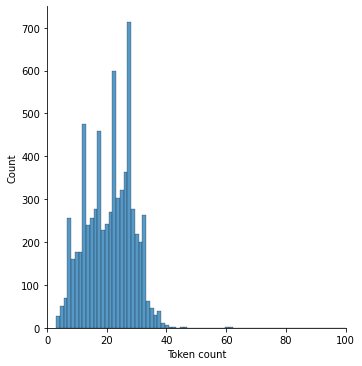

In [ ]:
sns.displot(tokenLengths)
plt.xlim([0, 100])
plt.xlabel('Token count')
plt.show()

In [ ]:
def bert_tokenizer(text,tokenizer,max_length):
    encoding = tokenizer.encode_plus(
    text,
    max_length=40,
    truncation=True,
    add_special_tokens=True, # Add '[CLS]' and '[SEP]'
    return_token_type_ids=False,
    padding='max_length',
    return_attention_mask=True,
    return_tensors='pt',  # Return PyTorch tensors
    )
    return encoding['input_ids'][0], encoding['attention_mask'][0] 

In [ ]:
max_length=40
trainTokenizedList = []
trainAttnMaskList = []
for text in list(train_text):
    tokenizedText, attnMask = bert_tokenizer(text,tokenizer,max_length)
    trainTokenizedList.append(tokenizedText.numpy())
    trainAttnMaskList.append(attnMask.numpy())

In [ ]:
max_length=40
validateTokenizedList = []
validateAttnMaskList = []
for text in list(validate_text):
    tokenizedText, attnMask = bert_tokenizer(text,tokenizer,max_length)
    validateTokenizedList.append(tokenizedText.numpy())
    validateAttnMaskList.append(attnMask.numpy())

In [ ]:
max_length=40
testTokenizedList = []
testAttnMaskList = []
for text in list(test_text):
    tokenizedText, attnMask = bert_tokenizer(text,tokenizer,max_length)
    testTokenizedList.append(tokenizedText.numpy())
    testAttnMaskList.append(attnMask.numpy())

In [ ]:
trainTokenisedTextDf = pd.DataFrame(trainTokenizedList)
validateTokenisedTextDf = pd.DataFrame(validateTokenizedList)
testTokenisedTextDf = pd.DataFrame(testTokenizedList)
trainTokenisedTextDf["anger"]=train_label["anger"]
trainTokenisedTextDf["anticipation"]=train_label["anticipation"]
trainTokenisedTextDf["disgust"]=train_label["disgust"]
trainTokenisedTextDf["fear"]=train_label["fear"]
trainTokenisedTextDf["joy"]=train_label["joy"]
trainTokenisedTextDf["love"]=train_label["love"]
trainTokenisedTextDf["optimism"]=train_label["optimism"]
trainTokenisedTextDf["pessimism"]=train_label["pessimism"]
trainTokenisedTextDf["sadness"]=train_label["pessimism"]
trainTokenisedTextDf["surprise"]=train_label["surprise"]
trainTokenisedTextDf["trust"]=train_label["trust"]

validateTokenisedTextDf["anger"]=val_label["anger"]
validateTokenisedTextDf["anticipation"]=val_label["anticipation"]
validateTokenisedTextDf["disgust"]=val_label["disgust"]
validateTokenisedTextDf["fear"]=val_label["fear"]
validateTokenisedTextDf["joy"]=val_label["joy"]
validateTokenisedTextDf["love"]=val_label["love"]
validateTokenisedTextDf["optimism"]=val_label["optimism"]
validateTokenisedTextDf["pessimism"]=val_label["pessimism"]
validateTokenisedTextDf["sadness"]=val_label["pessimism"]
validateTokenisedTextDf["surprise"]=val_label["surprise"]
validateTokenisedTextDf["trust"]=val_label["trust"]

In [ ]:
trainTokenisedTextDf.to_pickle("bertTrain.pkl")
validateTokenisedTextDf.to_pickle("bertValidate.pkl")
testTokenisedTextDf.to_pickle("bertTest.pkl")

In [ ]:
with open(r"trainAttnMaskList.pickle", "wb") as output_file:
  pickle.dump(trainAttnMaskList, output_file)

In [ ]:
with open(r"validateAttnMaskList.pickle", "wb") as output_file:
  pickle.dump(validateAttnMaskList, output_file)

In [ ]:
with open(r"testAttnMaskList.pickle", "wb") as output_file:
  pickle.dump(testAttnMaskList, output_file)

In [ ]:
MAX_SEQ_LENGTH = 40
BATCH_SIZE = 32
LEARNING_RATE = 2e-5
NUM_TRAIN_EPOCHS = 1.0
WARMUP_PROPORTION = 0.1
SAVE_CHECKPOINTS_STEPS = 1000
SAVE_SUMMARY_STEPS = 500

## BERT Training

In [ ]:
import pandas as pd
import numpy as np
import pickle
from sklearn.model_selection import train_test_split
from transformers import TFBertForSequenceClassification
import os
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn import metrics
import time

In [ ]:
bertTrain = pd.read_pickle("bertTrain.pkl")
bertValidate = pd.read_pickle("bertValidate.pkl")
bertTest = pd.read_pickle("bertTest.pkl")

In [ ]:
with open(r"trainAttnMaskList.pickle", "rb") as input_file:
  trainAttnMaskList = pickle.load(input_file)

In [ ]:
with open(r"validateAttnMaskList.pickle", "rb") as input_file:
  validateAttnMaskList = pickle.load(input_file)

In [ ]:
with open(r"testAttnMaskList.pickle", "rb") as input_file:
  testAttnMaskList = pickle.load(input_file)

In [ ]:

tain_label = bertTrain.loc[:,["anger","anticipation","disgust","fear","joy","love",'optimism','pessimism','sadness','surprise','trust']]
trainFeats  = bertTrain.drop(columns=["anger","anticipation","disgust","fear","joy","love",'optimism','pessimism','sadness','surprise','trust'])

validate_label = bertValidate.loc[:,["anger","anticipation","disgust","fear","joy","love",'optimism','pessimism','sadness','surprise','trust']]
valFeats  = bertValidate.drop(columns=["anger","anticipation","disgust","fear","joy","love",'optimism','pessimism','sadness','surprise','trust'])
trainMask = trainAttnMaskList
valMask = validateAttnMaskList

In [ ]:
testFeats = bertTest

In [ ]:
from transformers import TFBertPreTrainedModel
from transformers import TFBertMainLayer
import tensorflow as tf
import transformers
from transformers.modeling_tf_utils import TFPreTrainedModel, get_initializer
class TFBertForMultilabelClassification(TFBertPreTrainedModel):

    def __init__(self, config, *inputs, **kwargs):
        super(TFBertForMultilabelClassification, self).__init__(config, *inputs, **kwargs)
        self.num_labels = config.num_labels

        self.bert = TFBertMainLayer(config, name='bert')
        self.dropout = tf.keras.layers.Dropout(config.hidden_dropout_prob)
        self.classifier = tf.keras.layers.Dense(config.num_labels,
                                                kernel_initializer=get_initializer(config.initializer_range),
                                                name='classifier',
                                                activation='sigmoid')

    def call(self, inputs, **kwargs):
        outputs = self.bert(inputs, **kwargs)

        pooled_output = outputs[1]

        pooled_output = self.dropout(pooled_output, training=kwargs.get('training', False))
        logits = self.classifier(pooled_output)

        outputs = (logits,) + outputs[2:]  # add hidden states and attention if they are here

        return outputs  # logits, (hidden_states), (attentions)


In [ ]:
def accuracyMultilabel(labels, predictions):
    numerator = tf.reduce_sum(tf.cast(tf.multiply(predictions, labels), tf.float32), axis = -1)
    denominator = tf.cast(tf.reduce_sum(predictions + labels, axis = -1), tf.float32) - numerator + 0.000001
    accuracy = tf.divide(numerator, denominator)
    mean = tf.reduce_mean(accuracy)
    return mean

In [ ]:
def jaccard_similarity(y_true, y_pred, treshold=0.5,dummy = 0.000001):
    intersection = tf.cast(tf.reduce_sum(tf.round(y_true * y_pred), axis=-1),tf.float32)    
    union =  tf.cast(tf.math.count_nonzero((y_true+y_pred)>=treshold, axis=-1),tf.float32)    
    acc = tf.divide(intersection, union+dummy)
    jac = tf.reduce_mean(acc)
    return jac

In [ ]:

label_list =["anger","anticipation","disgust","fear","joy","love",'optimism','pessimism','sadness','surprise','trust']
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = TFBertForMultilabelClassification.from_pretrained('bert-base-uncased', num_labels=len(label_list))
optimizer = tf.keras.optimizers.Adam(learning_rate=2e-5)
loss = tf.keras.losses.BinaryCrossentropy()
metric = jaccard_similarity
model.summary()


Downloading:   0%|          | 0.00/511M [00:00<?, ?B/s]

Some layers from the model checkpoint at bert-base-uncased were not used when initializing TFBertForMultilabelClassification: ['nsp___cls', 'mlm___cls']
- This IS expected if you are initializing TFBertForMultilabelClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertForMultilabelClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some layers of TFBertForMultilabelClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier', 'dropout_37']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Model: "tf_bert_for_multilabel_classification"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bert (TFBertMainLayer)      multiple                  109482240 
                                                                 
 dropout_37 (Dropout)        multiple                  0         
                                                                 
 classifier (Dense)          multiple                  8459      
                                                                 
Total params: 109,490,699
Trainable params: 109,490,699
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(optimizer=optimizer, loss=loss, metrics=[metric])

In [ ]:
history=model.fit(trainFeats, train_label, batch_size=32, epochs=7,
                      validation_data=(valFeats, validate_label))

Epoch 1/7
214/214 [==============================] - 72s 221ms/step - loss: 0.4739 - jaccard_similarity: 0.0645 - val_loss: 0.3816 - val_jaccard_similarity: 0.4516
Epoch 2/7
214/214 [==============================] - 43s 201ms/step - loss: 0.3491 - jaccard_similarity: 0.4744 - val_loss: 0.3264 - val_jaccard_similarity: 0.5108
Epoch 3/7
214/214 [==============================] - 43s 199ms/step - loss: 0.2908 - jaccard_similarity: 0.5618 - val_loss: 0.3216 - val_jaccard_similarity: 0.5470
Epoch 4/7
214/214 [==============================] - 42s 198ms/step - loss: 0.2566 - jaccard_similarity: 0.6092 - val_loss: 0.3245 - val_jaccard_similarity: 0.5442
Epoch 5/7
214/214 [==============================] - 43s 200ms/step - loss: 0.2290 - jaccard_similarity: 0.6489 - val_loss: 0.3323 - val_jaccard_similarity: 0.5616
Epoch 6/7
214/214 [==============================] - 43s 201ms/step - loss: 0.2055 - jaccard_similarity: 0.6890 - val_loss: 0.3391 - val_jaccard_similarity: 0.5384
Epoch 7/7
214/21

In [ ]:
validation_result = model.predict(x=valFeats)

In [ ]:
treshold = 0.5
categPreds =[]
for elem in validation_result [0]:
  result = [1 if x>=treshold else 0 for x in elem]
  categPreds.append(result)

In [ ]:
from sklearn.metrics import jaccard_score
jaccard_score(val_label, categPreds, average="samples")

In [ ]:
pred = model.predict(x=testFeats)

In [ ]:
pred

(array([[0.02238702, 0.3141074 , 0.0112202 , ..., 0.01168164, 0.02334092,
         0.51660943],
        [0.03433276, 0.07656287, 0.02277371, ..., 0.01229801, 0.07614762,
         0.35160166],
        [0.94860524, 0.12864743, 0.80073696, ..., 0.03122439, 0.17836472,
         0.09858236],
        ...,
        [0.04011654, 0.05304466, 0.03285501, ..., 0.0164963 , 0.05135521,
         0.07405218],
        [0.9446353 , 0.09339705, 0.8982709 , ..., 0.11468136, 0.05869086,
         0.00521538],
        [0.01817051, 0.06591041, 0.09560969, ..., 0.97671777, 0.01882833,
         0.01397191]], dtype=float32),)

In [ ]:
treshold = 0.5
categPreds =[]
for elem in pred[0]:
  result = [1 if x>=treshold else 0 for x in elem]
  categPreds.append(result)

In [ ]:
from sklearn.metrics import jaccard_score
jaccard_score(test_label, categPreds, average="samples")

# LSTM

## EDA - Exploratory data analysis and Data Cleaning

In [ ]:
import warnings
warnings.filterwarnings('ignore')

!pip install fastbook==0.0.17
!pip uninstall tornado -y
!yes | pip install tornado==5.1.0

import fastbook
fastbook.setup_book()

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 719 kB 14.6 MB/s 
     |████████████████████████████████| 50 kB 1.6 MB/s 
     |████████████████████████████████| 1.2 MB 58.0 MB/s 
     |████████████████████████████████| 197 kB 47.1 MB/s 
     |████████████████████████████████| 60 kB 7.3 MB/s 
     |████████████████████████████████| 561 kB 55.6 MB/s 
     |████████████████████████████████| 53 kB 2.0 MB/s 
     |████████████████████████████████| 133 kB 45.7 MB/s 
     |████████████████████████████████| 132 kB 52.5 MB/s 
     |████████████████████████████████| 106 kB 54.2 MB/s 
     |████████████████████████████████| 428 kB 17.6 MB/s 
  Attempting uninstall: traitlets
    Found existing installation: traitlets 5.1.1
    Uninstalling traitlets-5.1.1:
      Successfully uninstalled traitlets-5.1.1
  Attempting uninstall: tornado
    Found existing installation: tornado 5.1.1
    Uninstalling tornado-5

Found existing installation: tornado 6.1
Uninstalling tornado-6.1:
  Successfully uninstalled tornado-6.1
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 516 kB 11.8 MB/s 
  Created wheel for tornado: filename=tornado-5.1-cp37-cp37m-linux_x86_64.whl size=462838 sha256=557cce760456eeabe6f5ab30affeaf62920082ef2daff499a4d37feeeebf080e
  Stored in directory: /root/.cache/pip/wheels/8e/53/de/6a6860ebf6d2958e20a9a8337f25b0369f1666002ade0ce284
Successfully built tornado
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
jupyter-client 7.3.4 requires tornado>=6.0, but you have tornado 5.1 which is incompatible.
Mounted at /content/gdrive


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import seaborn as sns

import re
import string
import unicodedata
from string import punctuation
from pathlib import Path

import fastai
from fastai import *
from fastai.text import *
from fastai.text.data import *
from fastai.text.all import *

import nltk
from nltk.tokenize import word_tokenize
from nltk.tokenize.toktok import ToktokTokenizer
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('punkt')

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn import metrics
from sklearn.compose import ColumnTransformer

import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.optim import Adam

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
train_df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Data/2018-E-c-En-train.txt", delimiter = "\t")
dev_df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Data/2018-E-c-En-dev.txt", delimiter = "\t")
test_df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Data/2018-E-c-En-test-gold.txt", delimiter = "\t")

# Print the shape of the train, dev and test data
print('{} rows and {} cols in training dataset.'.format(train_df.shape[0], train_df.shape[1]))
print('{} rows and {} cols in dev dataset.'.format(dev_df.shape[0], dev_df.shape[1]))
print('{} rows and {} cols in test dataset.'.format(test_df.shape[0], test_df.shape[1]))

6838 rows and 13 cols in training dataset.
886 rows and 13 cols in dev dataset.
3259 rows and 13 cols in test dataset.


In [ ]:
# Inspecting the training data
# "ID", "Tweet", "anger", "anticipation", "disgust", "fear", "joy", "love","optimism", "pessimism", "sadness", "surprise", "trust"
train_df.head(5)

,ID,Tweet,anger,anticipation,disgust,fear,joy,love,optimism,pessimism,sadness,surprise,trust
0,2017-En-21441,“Worry is a down payment on a problem you may never have'. Joyce Meyer. #motivation #leadership #worry,0,1,0,0,0,0,1,0,0,0,1
1,2017-En-31535,Whatever you decide to do make sure it makes you #happy.,0,0,0,0,1,1,1,0,0,0,0
2,2017-En-21068,"@Max_Kellerman it also helps that the majority of NFL coaching is inept. Some of Bill O'Brien's play calling was wow, ! #GOPATS",1,0,1,0,1,0,1,0,0,0,0
3,2017-En-31436,Accept the challenges so that you can literally even feel the exhilaration of victory.' -- George S. Patton 🐶,0,0,0,0,1,0,1,0,0,0,0
4,2017-En-22195,My roommate: it's okay that we can't spell because we have autocorrect. #terrible #firstworldprobs,1,0,1,0,0,0,0,0,0,0,0


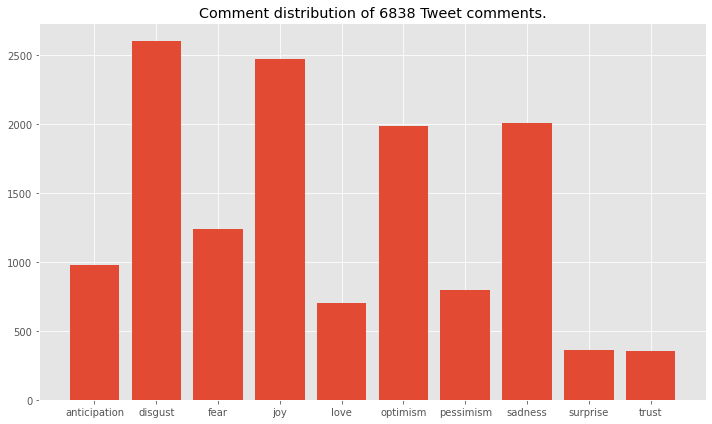

In [ ]:
# Look at the distribution of comments
f = lambda x: train_df[x].sum()
 
 
comment_types = train_df.columns[3:]
comment_counts = [f(x) for x in comment_types]
 
 
fig, ax = plt.subplots(1, 1, figsize = (10, 6))
plt.bar(comment_types, comment_counts)
ax.set_title(f"Comment distribution of {len(train_df)} Tweet comments.")
plt.tight_layout();

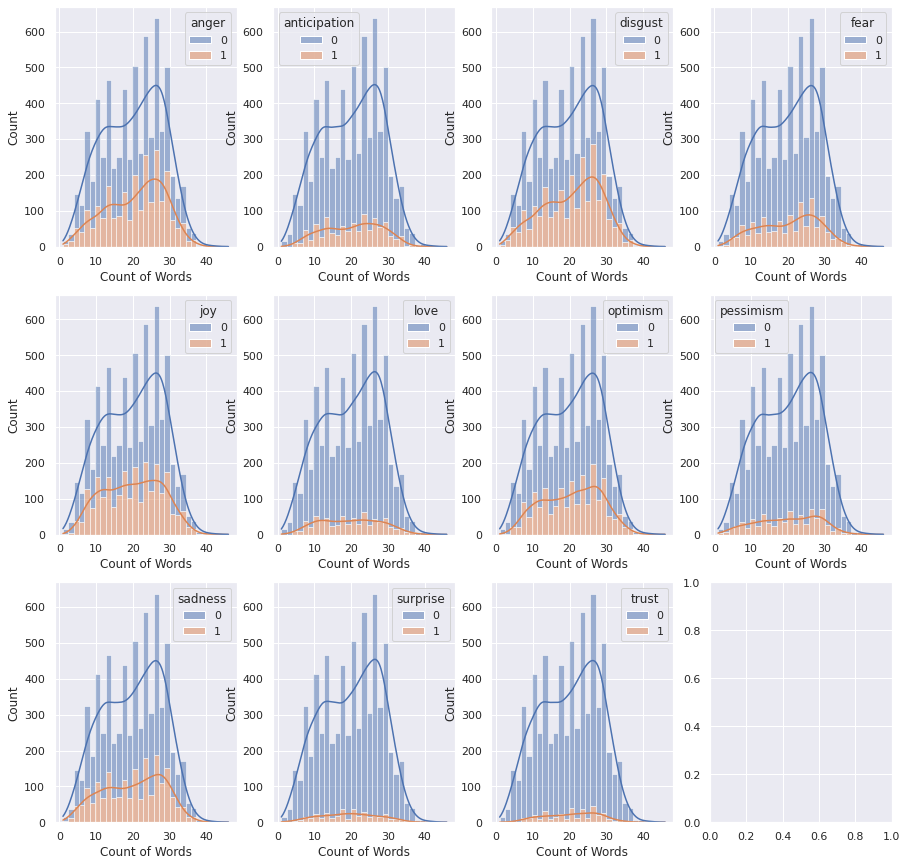

In [ ]:
train_df['Count of Words'] = train_df['Tweet'].apply(lambda x:len(word_tokenize(x)))
sns.set(style="darkgrid")
fig, axs = plt.subplots(3, 4, figsize=(15, 15))

sns.histplot(data=train_df, x="Count of Words", hue="anger", multiple="stack", kde=True, ax=axs[0, 0])
sns.histplot(data=train_df, x="Count of Words", hue="anticipation", multiple="stack", kde=True, ax=axs[0, 1])
sns.histplot(data=train_df, x="Count of Words", hue="disgust", multiple="stack", kde=True, ax=axs[0, 2])
sns.histplot(data=train_df, x="Count of Words", hue="fear", multiple="stack", kde=True, ax=axs[0, 3])
sns.histplot(data=train_df, x="Count of Words", hue="joy", multiple="stack", kde=True, ax=axs[1, 0])
sns.histplot(data=train_df, x="Count of Words", hue="love", multiple="stack", kde=True, ax=axs[1, 1])
sns.histplot(data=train_df, x="Count of Words", hue="optimism", multiple="stack", kde=True, ax=axs[1, 2])
sns.histplot(data=train_df, x="Count of Words", hue="pessimism", multiple="stack", kde=True, ax=axs[1, 3])
sns.histplot(data=train_df, x="Count of Words", hue="sadness", multiple="stack", kde=True, ax=axs[2, 0])
sns.histplot(data=train_df, x="Count of Words", hue="surprise", multiple="stack", kde=True, ax=axs[2, 1])
sns.histplot(data=train_df, x="Count of Words", hue="trust", multiple="stack", kde=True, ax=axs[2, 2])

plt.show()

train_df = train_df.drop(columns=['Count of Words'])

In [ ]:
#Remove special characters & retain alphabets
train_df["Tweet"] = train_df["Tweet"].str.replace("[^a-zA-Z]", " ")
dev_df["Tweet"] = dev_df["Tweet"].str.replace("[^a-zA-Z]", " ")
test_df["Tweet"] = test_df["Tweet"].str.replace("[^a-zA-Z]", " ")

#Lowering the case
train_df["Tweet"] = train_df["Tweet"].str.lower()
dev_df["Tweet"] = dev_df["Tweet"].str.lower()
test_df["Tweet"] = test_df["Tweet"].str.lower()

#stripping leading spaces (if any)
train_df["Tweet"] = train_df["Tweet"].str.strip()
dev_df["Tweet"] = dev_df["Tweet"].str.strip()
test_df["Tweet"] = test_df["Tweet"].str.strip()

#removing punctuations
def remove_punct(text):
  for punctuations in punctuation:
    text = text.replace(punctuations, '')
  return text

train_df["Tweet"] = train_df["Tweet"].apply(remove_punct)
dev_df["Tweet"] = dev_df["Tweet"].apply(remove_punct)
test_df["Tweet"] = test_df["Tweet"].apply(remove_punct)

#function to remove macrons & accented characters
def remove_accented_chars(text):
    text = unicodedata.normalize('NFKD', text).encode('ascii', 'ignore').decode('utf-8', 'ignore')
    return text

train_df["Tweet"] = train_df["Tweet"].apply(remove_accented_chars)
dev_df["Tweet"] = dev_df["Tweet"].apply(remove_accented_chars)
test_df["Tweet"] = test_df["Tweet"].apply(remove_accented_chars)

#Remove emojis function
def emoji_remove(text):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  
                           u"\U0001F300-\U0001F5FF"  
                           u"\U0001F680-\U0001F6FF"  
                           u"\U0001F1E0-\U0001F1FF"  
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)

train_df["Tweet"] = train_df["Tweet"].apply(emoji_remove)
dev_df["Tweet"] = dev_df["Tweet"].apply(emoji_remove)
test_df["Tweet"] = test_df["Tweet"].apply(emoji_remove)

#Removing Stopwords
stopword_list = set(stopwords.words('english'))
tokenizer = ToktokTokenizer()

def remove_stopwords(text, is_lower_case=False):
    tokens = tokenizer.tokenize(text)
    tokens = [token.strip() for token in tokens]
    if is_lower_case:
        filtered_tokens = [token for token in tokens if token not in stopword_list]
    else:
        filtered_tokens = [token for token in tokens if token.lower() not in stopword_list]
    filtered_text = ' '.join(filtered_tokens)    
    return filtered_text

train_df["Tweet"] = train_df["Tweet"].apply(remove_stopwords)
dev_df["Tweet"] = dev_df["Tweet"].apply(remove_stopwords)
test_df["Tweet"] = test_df["Tweet"].apply(remove_stopwords)

In [ ]:
train_data = train_df
dev_data = dev_df
test_data = test_df[['ID', 'Tweet']]
test_id = test_data['ID']
all_df = pd.concat([train_df, dev_df])

In [ ]:
train_data.to_csv("train_data.csv", index=False)
dev_data.to_csv("val_data.csv", index=False)
test_data.to_csv("test_data.csv", index=False)
all_df.to_csv("all_df.csv", index=False)

In [ ]:
data_path = Path('/content/')
data_path.ls()

(#8) [Path('/content/.config'),Path('/content/val_data.csv'),Path('/content/test_data.csv'),Path('/content/train_data.csv'),Path('/content/all_df.csv'),Path('/content/drive'),Path('/content/gdrive'),Path('/content/sample_data')]

## ULMFiT - Universal Language Model Fine-tuning for Text Classification

In [ ]:
lm_df=all_df[['ID','Tweet']]
#For creating a language model
lm_data = TextDataLoaders.from_df(lm_df,
                  #Specify the column that contains the comments
                  text_col='Tweet',
                  #Specify how much data is within train and validation sets
                  valid_pct=0.2,
                  #Mention explicitly that this dataloader is meant for language model
                  is_lm=True,
                  #Pick a sequence legth i.e. how many words to feed through the RNN at once
                  seq_len=40,
                  #Specify the batch size for the dataloader
                  bs=64)
lm_data.show_batch(max_n=3)

,text,text_
0,xxbos xxunk horror h sure lol xxunk decision xxbos let behavior others destroy ur inner peace dalai lama xxunk healing depression xxunk meditation book xxbos xxunk hey bae xxunk happy th month anniversary ily xxbos xxunk lol wish understood crazy,xxunk horror h sure lol xxunk decision xxbos let behavior others destroy ur inner peace dalai lama xxunk healing depression xxunk meditation book xxbos xxunk hey bae xxunk happy th month anniversary ily xxbos xxunk lol wish understood crazy rabid
1,xxunk xxbos cure anxiety xxunk relationship christ john xxbos hi names anxiety xxunk xxbos like hello first born must always laugh jokes xxbos good start day forgot set alarm well friday xxbos xxunk like box coffee xxunk horrible xxbos mr,xxbos cure anxiety xxunk relationship christ john xxbos hi names anxiety xxunk xxbos like hello first born must always laugh jokes xxbos good start day forgot set alarm well friday xxbos xxunk like box coffee xxunk horrible xxbos mr h
2,y ing xxunk xxunk xxunk xxunk xxbos america openly xxunk racism xxbos mhchat think sadness felt strongly physically mentally feels like takes hard focus work mhchat xxbos told chiropractor good time long time xxunk xxunk yet xxunk doctor xxbos xxunk,ing xxunk xxunk xxunk xxunk xxbos america openly xxunk racism xxbos mhchat think sadness felt strongly physically mentally feels like takes hard focus work mhchat xxbos told chiropractor good time long time xxunk xxunk yet xxunk doctor xxbos xxunk dull


In [ ]:
lm_learn = language_model_learner(lm_data, 
                AWD_LSTM, 
                drop_mult=0.3,
                metrics=[accuracy, Perplexity()]).to_fp16()

SuggestedLRs(valley=0.002511886414140463)

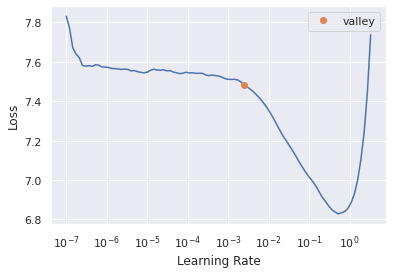

In [ ]:
# Finding the optimal learning rate
lm_learn.lr_find()

In [ ]:
# Fit using one cycle policy
lm_learn.fit_one_cycle(1, 1e-2)

epoch,train_loss,valid_loss,accuracy,perplexity,time
0,6.483625,6.070751,0.196894,433.005829,00:08


In [ ]:
# Unfreeze all layers
lm_learn.unfreeze()
# fit one cycle for 10 epochs
lm_learn.fit_one_cycle(10, 1e-2)

epoch,train_loss,valid_loss,accuracy,perplexity,time
0,5.799122,6.185358,0.207161,485.586578,00:09
1,5.711247,5.664521,0.228609,288.449707,00:09
2,5.334632,5.568874,0.251172,262.138855,00:09
3,4.781754,5.709859,0.262909,301.828613,00:11
4,4.094499,5.821636,0.282143,337.523712,00:09
5,3.362980,6.102658,0.296224,447.044556,00:09
6,2.674774,6.385741,0.302865,593.324341,00:09
7,2.118855,6.566094,0.304353,710.588806,00:09
8,1.732541,6.643604,0.301972,767.857239,00:09
9,1.479534,6.673759,0.302902,791.364746,00:09


In [ ]:
# save the encoder
lm_learn.save_encoder('fine_tuned_encoder')

In [ ]:
#Make a list of columns that would serve as your labels for this task
label_cols=list(all_df.columns[2:])

# Create a column of texts which has a list of all the categories.
# When all the entries are zeros, let's call the txt sober
def get_labels(row):
    indcs = np.where(row == 1)[0]
    if len(indcs) == 0:
        return "sober"
    return ";".join([label_cols[x] for x in indcs])
    
# Get the labels all in a nicely formatted style
labels=all_df[label_cols].apply(lambda row: get_labels(row), axis = 1)
 
 
# Add the labels object to our dataframe
all_df["Labels"] = labels

In [ ]:
# Create a Dataloader to feed to the model
data_blk = DataBlock(
    blocks = (TextBlock.from_df(text_cols='Tweet',
                    vocab=lm_data.vocab,
                    seq_len=40),
                    MultiCategoryBlock(add_na=True)),
                    get_x=ColReader(cols="text"),
                    get_y=ColReader(cols="Labels", label_delim = ';'),
                    splitter = TrainTestSplitter(test_size=0.2, random_state=21))
 
clas_data = data_blk.dataloaders(all_df, bs=64, seed=20)

In [ ]:
clas_data.show_batch(max_n=3)

,text,None
0,xxbos xxunk baby ha xxrep 4 p y ha xxrep 4 p xxrep 6 y ha xxrep 6 p xxrep 5 y h xxrep 3 a xxrep 3 p xxrep 4 y birthday best friend love lots chapter xxunk love,joy;love
1,xxbos ff n n family x n n soul blues amp rock band n n music heart n xxunk soul amp passion n xxunk xx,joy
2,xxbos gon na eat pick brother get car washed amp finally go home re xxrep 5 s t amp watch fast amp furious movies,anticipation;joy;optimism


In [ ]:
# Building the classifier
classifier_learn = text_classifier_learner(clas_data, 
                       AWD_LSTM, 
                       drop_mult=0.3,
                       pretrained=True, 
                       metrics=[accuracy_multi, Perplexity()])
classifier_learn.summary()

SequentialRNN (Input shape: 64 x 40)
Layer (type)         Output Shape         Param #    Trainable 
                     64 x 40 x 1152      
LSTM                                                           
LSTM                                                           
____________________________________________________________________________
                     64 x 40 x 400       
LSTM                                                           
RNNDropout                                                     
RNNDropout                                                     
RNNDropout                                                     
BatchNorm1d                               2400       True      
Dropout                                                        
____________________________________________________________________________
                     64 x 50             
Linear                                    60000      True      
ReLU                                       

SuggestedLRs(valley=0.002511886414140463)

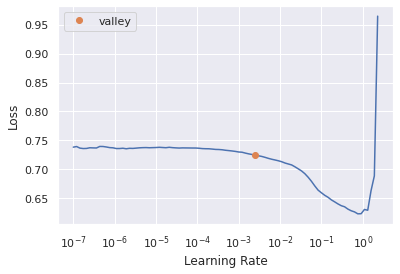

In [ ]:
# loading the saved encoder
classifier_learn.load_encoder('fine_tuned_encoder')
classifier_learn.lr_find()

In [ ]:
# fine tuning the whole network
classifier_learn.fit_one_cycle(1, 5e-2)  

epoch,train_loss,valid_loss,accuracy_multi,perplexity,time
0,0.377154,0.343749,0.851979,1.410224,00:12


In [ ]:
# unfreeze last 2 layers
classifier_learn.freeze_to(-2)
classifier_learn.fit_one_cycle(1, slice(5e-2/(2.6**4),5e-2))
# unfreeze last 3 layers
classifier_learn.freeze_to(-3)
classifier_learn.fit_one_cycle(1, slice(5e-2/(2.6**4),5e-2))
# unfreeze last 4 layers
classifier_learn.freeze_to(-4)
classifier_learn.fit_one_cycle(1, slice(5e-2/(2.6**4),5e-2))
# unfreeze last 5 layers
classifier_learn.freeze_to(-5)
classifier_learn.fit_one_cycle(1, slice(5e-2/(2.6**4),5e-2))

epoch,train_loss,valid_loss,accuracy_multi,perplexity,time
0,0.355816,0.335938,0.856410,1.399253,00:12


epoch,train_loss,valid_loss,accuracy_multi,perplexity,time
0,0.339404,0.318214,0.868210,1.374670,00:12


epoch,train_loss,valid_loss,accuracy_multi,perplexity,time
0,0.306297,0.307515,0.873040,1.360041,00:14


epoch,train_loss,valid_loss,accuracy_multi,perplexity,time
0,0.280411,0.302233,0.874185,1.352876,00:13


In [ ]:
# Unfreezing all the layers and training
classifier_learn.unfreeze() # unfreze all
classifier_learn.fit_one_cycle(5, slice(5e-2/(2.6**4),5e-2))

epoch,train_loss,valid_loss,accuracy_multi,perplexity,time
0,0.246035,0.326408,0.863480,1.385981,00:13
1,0.260763,0.325300,0.865671,1.384446,00:13
2,0.237022,0.331613,0.870650,1.393214,00:13
3,0.192792,0.338784,0.870749,1.403241,00:13
4,0.153461,0.358974,0.870401,1.431860,00:13


## Inference and Estimated Accuracy

In [ ]:
#Export the model and save it for inference
classifier_learn.export("Detecting_Emotions.pkl")

#Load the trained learner on GPU for fast predictions 
classifier_learn = load_learner("Detecting_Emotions.pkl", cpu = False)

# Create a test dataloader for making predictions
tok_inf_df = tokenize_df(test_df, "Tweet")
inf_dl = classifier_learn.dls.test_dl(tok_inf_df[0])

# Predict probabilities for all the classes 
all_predictions = classifier_learn.get_preds(dl = inf_dl, reorder = False)
probs = all_predictions[0].numpy()

In [ ]:
test_df.head(5)

,ID,Tweet,anger,anticipation,disgust,fear,joy,love,optimism,pessimism,sadness,surprise,trust
0,2018-En-01559,adnan asyounotwish dont worry indian army ways dispatch terrorists hell,1,1,0,0,0,0,1,0,0,0,1
1,2018-En-03739,academy sciences eschews normally sober tone scientific papers calls massive loss wildlife biological annihilation,0,0,1,0,0,0,0,0,0,0,0
2,2018-En-00385,blew opportunity mad,1,0,1,0,0,0,0,0,1,0,0
3,2018-En-03001,time weeks,0,0,0,0,1,0,0,0,1,0,0
4,2018-En-01988,deppression real partners w depressed people truly dont understand depth affect us add anxiety amp makes worse,0,0,0,1,0,0,0,0,1,0,0


In [ ]:
# IDs for the comment_text
idxs = test_df.loc[inf_dl.get_idxs()].ID.reset_index(drop = True)

# The order id in test data
indices = inf_dl.get_idxs()

# Create a Predictions dataframe for submission
predictions = pd.DataFrame(all_predictions[0].numpy(), columns=classifier_learn.dls.vocab[1])
predictions["ID"] = idxs
predictions["order"] = indices

# Curate the dataframe to match the submission format
predictions = predictions.sort_values(by = ["order"])
predictions = predictions[["ID", "anger", "anticipation", "disgust", "fear", "joy", "love", "optimism", "pessimism", "sadness", "surprise", "trust"]].reset_index(drop = True)

In [ ]:
predictions.head(10)

,ID,anger,anticipation,disgust,fear,joy,love,optimism,pessimism,sadness,surprise,trust
0,2018-En-01559,0.689302,0.131948,0.538307,0.978934,0.004476,0.002518,0.067250,0.080840,0.038329,0.005892,0.012069
1,2018-En-03739,0.870227,0.183700,0.838818,0.023379,0.007851,0.000984,0.077986,0.224908,0.542986,0.042482,0.011786
2,2018-En-00385,0.886579,0.038167,0.830914,0.527863,0.007927,0.003247,0.012360,0.111774,0.291756,0.012795,0.003312
3,2018-En-03001,0.258605,0.100923,0.440719,0.008439,0.008807,0.001568,0.017253,0.076646,0.168695,0.010712,0.003795
4,2018-En-01988,0.041205,0.004727,0.212394,0.134688,0.004160,0.000262,0.004509,0.536462,0.996737,0.001143,0.000276
5,2018-En-03463,0.846401,0.199853,0.808811,0.966173,0.025347,0.005480,0.057348,0.091194,0.063523,0.139007,0.034306
6,2018-En-04315,0.255275,0.280839,0.473992,0.370892,0.039256,0.008581,0.007443,0.130421,0.146377,0.342209,0.009247
7,2018-En-01426,0.183069,0.376544,0.429928,0.007659,0.031655,0.004428,0.039628,0.151166,0.421270,0.131512,0.014755
8,2018-En-03332,0.002371,0.049300,0.002792,0.000067,0.991291,0.139282,0.966951,0.001999,0.013941,0.003820,0.079067
9,2018-En-01938,0.007519,0.014088,0.068553,0.038087,0.034123,0.004523,0.020681,0.535623,0.995593,0.003121,0.001623


In [ ]:
predictLabels = np.asarray(predictions.drop(['ID'], axis=1))

treshold = 0.5
categPreds =[]
for elem in predictLabels:
  result = [1 if x>=treshold else 0 for x in elem]
  categPreds.append(result)


In [ ]:
testLabels = np.asarray(test_df.drop(['ID', 'Tweet'], axis=1))

from sklearn.metrics import jaccard_score
jaccard_score(testLabels, categPreds, average="samples")

0.4846425283829396

# Transformer

## Data loading, cleaning and tokenization

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
%cd /content/gdrive/MyDrive/NLP Project

/content/gdrive/MyDrive/NLP Project


In [ ]:
import nltk
from nltk.corpus import stopwords
import pandas as pd
import re
from nltk.stem import PorterStemmer
nltk.download('stopwords')
nltk.download('wordnet')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [ ]:
train = pd.read_csv('2018-E-c-En-train.txt', sep='\t', error_bad_lines=False)
val = pd.read_csv('2018-E-c-En-dev.txt', sep='\t', error_bad_lines=False)
test = pd.read_csv('2018-E-c-En-test-gold.txt', sep='\t', error_bad_lines=False)


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  exec(code_obj, self.user_global_ns, self.user_ns)


In [ ]:
stop_words = set(stopwords.words('english'))
stop_words.update(["now","let", 'zero', 'one', 'two', 'three','four','five','six','seven','eight','nine','ten','may','also','across','among','beside','however','yet','within'])
re_stop_words = re.compile(r"\b(" + "|".join(stop_words) + ")\\W", re.I)

In [ ]:
def removeStopWords(sentence):
    global re_stop_words
    return re_stop_words.sub(" ", sentence)

train['Tweet'] = train['Tweet'].apply(removeStopWords)
val['Tweet'] = val['Tweet'].apply(removeStopWords)
test['Tweet'] = test['Tweet'].apply(removeStopWords)

In [ ]:
def simpleClean(x):
    # lowercase
    x = x.lower()
    # remove unicode characters
    x = x.encode('ascii', 'ignore').decode()
    x = re.sub(r'https*\S+', ' ', x)
    x = re.sub(r'http*\S+', ' ', x)
    # then use regex to remove @ symbols and hashtags
    #x = re.sub(r'@\S', '', x)
    #x = re.sub(r'#\S+', ' ', x)
    x = re.sub(r'\'\w+', '', x)
    #x = re.sub('[%s]' % re.escape(string.punctuation), ' ', x)
    x = re.sub(r'\w*\d+\w*', '', x)
    x = re.sub(r'\s{2,}', ' ', x)
    x = re.sub(r'\s[^\w\s]\s', '', x)
    return x

train['Tweet'] = train['Tweet'].apply(simpleClean)
val['Tweet'] = val['Tweet'].apply(simpleClean)
test['Tweet'] = test['Tweet'].apply(simpleClean)

In [ ]:
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
def lemmatizing(sentence):
    lemmaSentence = ""
    for word in sentence.split():
        word = word.lower()
        lemma = lemmatizer.lemmatize(word)
        lemmaSentence += lemma
        lemmaSentence += " "
    lemmaSentence = lemmaSentence.strip()
    return lemmaSentence

train['Tweet'] = train['Tweet'].apply(lemmatizing)
val['Tweet'] = val['Tweet'].apply(lemmatizing)
test['Tweet'] = test['Tweet'].apply(lemmatizing)

In [ ]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

In [ ]:
max_features = 13000
tokenizer = Tokenizer(num_words=max_features)
tokenizer.fit_on_texts(list(train['Tweet']))
X_train = tokenizer.texts_to_sequences(train['Tweet'])
X_val = tokenizer.texts_to_sequences(val['Tweet'])
X_test = tokenizer.texts_to_sequences(test['Tweet'])

In [ ]:
len(max(X_train, key=len))


26

In [ ]:
max_words = 30
X_train =pad_sequences(X_train, maxlen=max_words)
X_val =pad_sequences(X_val, maxlen=max_words)
X_test =pad_sequences(X_test, maxlen=max_words)

In [ ]:
import numpy as np
trainLabels = np.asarray(train.drop(['ID', 'Tweet'], axis=1))
valLabels = np.asarray(val.drop(['ID', 'Tweet'], axis=1))
testLabels = np.asarray(test.drop(['ID', 'Tweet'], axis=1))

## Transformer definition and creating baseline

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [ ]:
class TransformerBlock(layers.Layer):
    def __init__(self, embed_dim, num_heads, ff_dim, rate=0.1):
        super(TransformerBlock, self).__init__()
        self.att = layers.MultiHeadAttention(num_heads=num_heads, key_dim=embed_dim)
        self.ffn = keras.Sequential(
            [layers.Dense(ff_dim, activation="relu"), layers.Dense(embed_dim),]
        )
        self.layernorm1 = layers.LayerNormalization(epsilon=1e-6)
        self.layernorm2 = layers.LayerNormalization(epsilon=1e-6)
        self.dropout1 = layers.Dropout(rate)
        self.dropout2 = layers.Dropout(rate)

    def call(self, inputs, training):
        attn_output = self.att(inputs, inputs)
        attn_output = self.dropout1(attn_output, training=training)
        out1 = self.layernorm1(inputs + attn_output)
        ffn_output = self.ffn(out1)
        ffn_output = self.dropout2(ffn_output, training=training)
        return self.layernorm2(out1 + ffn_output)

In [ ]:
class TokenAndPositionEmbedding(layers.Layer):
    def __init__(self, maxlen, vocab_size, embed_dim):
        super(TokenAndPositionEmbedding, self).__init__()
        self.token_emb = layers.Embedding(input_dim=vocab_size, output_dim=embed_dim)
        self.pos_emb = layers.Embedding(input_dim=maxlen, output_dim=embed_dim)

    def call(self, x):
        maxlen = tf.shape(x)[-1]
        positions = tf.range(start=0, limit=maxlen, delta=1)
        positions = self.pos_emb(positions)
        x = self.token_emb(x)
        return x + positions

In [ ]:
embed_dim = 20  # Embedding size for each token
num_heads = 1  # Number of attention heads
ff_dim = 10  # Hidden layer size in feed forward network inside transformer

inputs = layers.Input(shape=(max_words,))
embedding_layer = TokenAndPositionEmbedding(max_words, max_features, embed_dim)
x = embedding_layer(inputs)
transformer_block = TransformerBlock(embed_dim, num_heads, ff_dim)
x = transformer_block(x)
x = layers.GlobalAveragePooling1D()(x)
x = layers.Dropout(0.1)(x)
x = layers.Dense(50, activation="relu")(x)
x = layers.Dropout(0.1)(x)
outputs = layers.Dense(11, activation="sigmoid")(x)

model = keras.Model(inputs=inputs, outputs=outputs)

In [ ]:
def accuracyMultilabel(labels, predictions):
    numerator = tf.reduce_sum(tf.cast(tf.multiply(predictions, labels), tf.float32), axis = -1)
    denominator = tf.cast(tf.reduce_sum(predictions + labels, axis = -1), tf.float32) - numerator + 0.000001
    accuracy = tf.divide(numerator, denominator)
    mean = tf.reduce_mean(accuracy)
    return mean

In [ ]:
def jaccard_similarity(y_true, y_pred, treshold=0.5,dummy = 0.000001):
    intersection = tf.cast(tf.reduce_sum(tf.round(y_true * y_pred), axis=-1),tf.float32)    
    union =  tf.cast(tf.math.count_nonzero((y_true+y_pred)>=treshold, axis=-1),tf.float32)    
    acc = tf.divide(intersection, union+dummy)
    jac = tf.reduce_mean(acc)
    return jac

In [ ]:
model.compile(optimizer="adam", loss="binary_crossentropy", metrics=[jaccard_similarity])
history = model.fit(
    X_train, trainLabels, batch_size=32, epochs=10, validation_data=(X_val, valLabels)
)

Epoch 1/10
214/214 [==============================] - 7s 15ms/step - loss: 0.4874 - jaccard_similarity: 0.0530 - val_loss: 0.4745 - val_jaccard_similarity: 5.5804e-04
Epoch 2/10
214/214 [==============================] - 3s 13ms/step - loss: 0.3978 - jaccard_similarity: 0.3262 - val_loss: 0.3851 - val_jaccard_similarity: 0.4212
Epoch 3/10
214/214 [==============================] - 3s 13ms/step - loss: 0.3145 - jaccard_similarity: 0.5146 - val_loss: 0.3696 - val_jaccard_similarity: 0.4760
Epoch 4/10
214/214 [==============================] - 3s 14ms/step - loss: 0.2698 - jaccard_similarity: 0.5841 - val_loss: 0.3989 - val_jaccard_similarity: 0.4460
Epoch 5/10
214/214 [==============================] - 3s 14ms/step - loss: 0.2347 - jaccard_similarity: 0.6365 - val_loss: 0.4029 - val_jaccard_similarity: 0.4885
Epoch 6/10
214/214 [==============================] - 3s 13ms/step - loss: 0.2071 - jaccard_similarity: 0.6802 - val_loss: 0.4359 - val_jaccard_similarity: 0.4840
Epoch 7/10
214/214

## Hyperparameter optimisaton

In [ ]:
def tryHyperparameters(embed_dims,num_heads,ffDims,denseLayers):
  resultsDict = {"embed_dim":[],"numHead":[],"ffDim":[],"layer":[],"val_jaccard_similarity":[]};
  for embed_dim in embed_dims:
    for numHead in num_heads:
      for ffDim in ffDims:
        for layer in denseLayers:
          inputs = layers.Input(shape=(max_words,))
          embedding_layer = TokenAndPositionEmbedding(max_words, max_features, embed_dim)
          x = embedding_layer(inputs)
          transformer_block = TransformerBlock(embed_dim, numHead, ffDim)
          x = transformer_block(x)
          x = layers.GlobalAveragePooling1D()(x)
          x = layers.Dropout(0.1)(x)
          x = layers.Dense(layer, activation="relu")(x)
          x = layers.Dropout(0.1)(x)
          outputs = layers.Dense(11, activation="sigmoid")(x)
          model = keras.Model(inputs=inputs, outputs=outputs)
          model.compile(optimizer="adam", loss="binary_crossentropy", metrics=[jaccard_similarity])
          history = model.fit(
              X_train, trainLabels, batch_size=32, epochs=5, validation_data=(X_val, valLabels)
          )
          finalValSim = history.history["val_jaccard_similarity"][-1]
          resultsDict["embed_dim"].append(embed_dim) 
          resultsDict["numHead"].append(numHead)
          resultsDict["ffDim"].append(ffDim)
          resultsDict["layer"].append(layer)
          resultsDict["val_jaccard_similarity"].append(finalValSim)
  return resultsDict

In [ ]:
embed_dims = [10,20,30,40]
num_heads = [1,2,3]
ffDims = [10,20,30]
denseLayers = [40,50,60]
resultsDict=tryHyperparameters(embed_dims,num_heads,ffDims,denseLayers)

In [ ]:
import pickle
pickle.dump(resultsDict, open( "resultsDict.p", "wb" ) )

In [ ]:
import pickle
resultsDictLoaded = pickle.load( open( "resultsDict.p", "rb" ) )

In [ ]:
valScores = resultsDict["val_jaccard_similarity"]
bestIndex = np.argmax(valScores)
bestValScore = valScores[bestIndex]
bestEmbedDim = resultsDict["embed_dim"][bestIndex] 
bestHeadNum= resultsDict["numHead"][bestIndex]
bestFeedForward =  resultsDict["ffDim"][bestIndex]
bestLayer = resultsDict["layer"][bestIndex]

In [ ]:
print("best val score={} & best embed dim={} & bestHead={} & bestFeedForward={} & bestLayer={}".format(bestValScore,bestEmbedDim,bestHeadNum,bestFeedForward,bestLayer))

best val score=0.5136699676513672 & best embed dim=30 & bestHead=3 & bestFeedForward=30 & bestLayer=50


## Training optimal model

In [ ]:
embed_dim = 30  # Embedding size for each token
num_heads = 3  # Number of attention heads
ff_dim = 30  # Hidden layer size in feed forward network inside transformer

inputs = layers.Input(shape=(max_words,))
embedding_layer = TokenAndPositionEmbedding(max_words, max_features, embed_dim)
x = embedding_layer(inputs)
transformer_block = TransformerBlock(embed_dim, num_heads, ff_dim)
x = transformer_block(x)
x = layers.GlobalAveragePooling1D()(x)
x = layers.Dropout(0.1)(x)
x = layers.Dense(50, activation="relu")(x)
x = layers.Dropout(0.1)(x)
outputs = layers.Dense(11, activation="sigmoid")(x)

model = keras.Model(inputs=inputs, outputs=outputs)

In [ ]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 30)]              0         
                                                                 
 token_and_position_embeddin  (None, 30, 30)           390900    
 g (TokenAndPositionEmbeddin                                     
 g)                                                              
                                                                 
 transformer_block (Transfor  (None, 30, 30)           13080     
 merBlock)                                                       
                                                                 
 global_average_pooling1d (G  (None, 30)               0         
 lobalAveragePooling1D)                                          
                                                                 
 dropout_2 (Dropout)         (None, 30)                0     

In [ ]:
model.load_weights('../models/transformer.ckpt')

In [ ]:
model.compile(optimizer="adam", loss="binary_crossentropy", metrics=[jaccard_similarity])
history = model.fit(
    X_train, trainLabels, batch_size=32, epochs=7, validation_data=(X_val, valLabels)
)

Epoch 1/7
214/214 [==============================] - 17s 44ms/step - loss: 0.4887 - jaccard_similarity: 0.0492 - val_loss: 0.4743 - val_jaccard_similarity: 0.0000e+00
Epoch 2/7
214/214 [==============================] - 6s 27ms/step - loss: 0.3898 - jaccard_similarity: 0.3463 - val_loss: 0.3843 - val_jaccard_similarity: 0.3654
Epoch 3/7
214/214 [==============================] - 6s 26ms/step - loss: 0.2966 - jaccard_similarity: 0.5453 - val_loss: 0.3814 - val_jaccard_similarity: 0.5014
Epoch 4/7
214/214 [==============================] - 5s 25ms/step - loss: 0.2408 - jaccard_similarity: 0.6273 - val_loss: 0.3953 - val_jaccard_similarity: 0.4979
Epoch 5/7
214/214 [==============================] - 5s 25ms/step - loss: 0.1964 - jaccard_similarity: 0.7010 - val_loss: 0.4492 - val_jaccard_similarity: 0.5128
Epoch 6/7
214/214 [==============================] - 5s 25ms/step - loss: 0.1623 - jaccard_similarity: 0.7492 - val_loss: 0.5094 - val_jaccard_similarity: 0.4794
Epoch 7/7
214/214 [====

## Testing optimal model

In [ ]:
import time as tt
start=tt.time()
pred = model.predict(X_test)
end=tt.time()
elapsedTime = end-start
print('Elapsed time is {}'.format(elapsedTime))
treshold = 0.5
categPreds =[]
for elem in pred:
  result = [1 if x>=treshold else 0 for x in elem]
  categPreds.append(result)


Elapsed time is 1.2012622356414795


In [ ]:
from sklearn.metrics import jaccard_score
jaccard_score(testLabels, categPreds, average="samples")

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Jaccard is ill-defined and being set to 0.0 in samples with no true or predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


0.46208740630342354

In [ ]:
model.save_weights('../models/transformer.ckpt')